In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame, concat, read_csv
sns.set_theme(style='white', context='notebook', font_scale=1.33)

## Section 1: Factor Loadings

In [2]:
## Load design data.
design = read_csv(os.path.join('data', 'design.csv'), index_col=0)
ld = [[6,7,8], [9,10,11], [13,14], [15,16], [19,20], [21,22,23], [24,25], [33,34,35], [36,37]]
for ix in ld: 
    design = design.drop(index=ix[1:])
    design = design.rename(index={ix[0]:'/'.join(['%s' %i for i in ix])})

### 1.1 One-factor model

In [3]:
from pandas import DataFrame

## Define I/O parameters.
studies = ['teicher2015','tuominen2022']

## Main loop.
summary = []
for study in studies:
    df = read_csv(os.path.join('stan_results', study, 'grmq_m1_summary.tsv'), sep='\t', index_col=0)    
    df = df.T.filter(regex='lambda\[[0-9]*,1\]').T['Mean']
    summary.append(df)
    
## Convert to DataFrame.
summary = DataFrame(summary).T
summary.columns = studies
summary.index = design.index

## Print summary.
summary.describe().round(3)

,teicher2015,tuominen2022
count,39.000,39.000
mean,0.596,0.600
std,0.118,0.107
min,0.280,0.360
25%,0.525,0.530
50%,0.590,0.600
75%,0.670,0.675
max,0.860,0.810


In [4]:
summary.corr(method='spearman')

,teicher2015,tuominen2022
teicher2015,1.000000,0.669557
tuominen2022,0.669557,1.000000


In [5]:
(summary.teicher2015 - summary.tuominen2022).sort_values()

item
42         -0.35
52         -0.21
51         -0.21
43         -0.19
48         -0.11
44         -0.10
38         -0.10
33/34/35   -0.04
30         -0.04
36/37      -0.02
21/22/23   -0.01
39          0.00
45          0.00
4           0.00
27          0.01
6/7/8       0.01
17          0.01
3           0.02
40          0.02
49          0.02
32          0.02
41          0.02
24/25       0.03
50          0.03
26          0.04
46          0.04
47          0.04
5           0.05
12          0.05
28          0.06
15/16       0.06
19/20       0.06
9/10/11     0.07
18          0.07
29          0.07
2           0.10
13/14       0.10
1           0.10
31          0.11
dtype: float64

In [6]:
(summary.teicher2015 - summary.tuominen2022).describe()

count    39.000000
mean     -0.004359
std       0.097786
min      -0.350000
25%      -0.015000
50%       0.020000
75%       0.055000
max       0.110000
dtype: float64

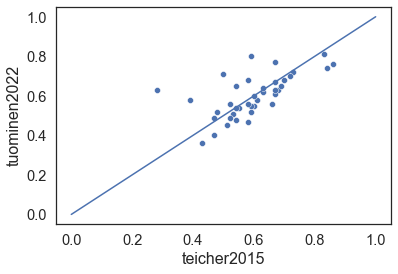

In [7]:
ax = sns.scatterplot(x=summary.teicher2015, y=summary.tuominen2022)
ax.plot([0,1],[0,1])

### 1.2 Bifactor Model (10 groups)

In [8]:
from pandas import DataFrame

## Define I/O parameters.
studies = ['teicher2015','tuominen2022']

## Main loop.
summary = []
for study in studies:
    df = read_csv(os.path.join('stan_results', study, 'grmq_m2_summary.tsv'), sep='\t', index_col=0)    
    df = df.T.filter(regex='lambda\[[0-9]*,1\]').T['Mean']
    summary.append(df)
    
## Convert to DataFrame.
summary = DataFrame(summary).T
summary.columns = studies

## Print summary.
summary.describe().round(3)

,teicher2015,tuominen2022
count,39.000,39.000
mean,0.574,0.580
std,0.145,0.123
min,0.230,0.300
25%,0.470,0.500
50%,0.600,0.580
75%,0.680,0.660
max,0.860,0.830


In [9]:
from pandas import DataFrame

## Define I/O parameters.
studies = ['teicher2015','tuominen2022']

## Main loop.
summary = []
for study in studies:
    df = read_csv(os.path.join('stan_results', study, 'grmq_m2_summary.tsv'), sep='\t', index_col=0)    
    df = df.T.filter(regex='lambda\[[0-9]*,[^1]|lambda\[[0-9]*,1[0-2]').T['Mean']
    summary.append(df)
    
## Convert to DataFrame.
summary = DataFrame(summary).T
summary.columns = studies

## Print summary.
summary.describe().round(3)

,teicher2015,tuominen2022
count,39.000,39.000
mean,0.313,0.343
std,0.205,0.189
min,0.014,0.043
25%,0.140,0.175
50%,0.310,0.340
75%,0.450,0.480
max,0.800,0.700


### 1.3 Bifactor S-1 Model (3 groups)

In [10]:
from pandas import DataFrame

## Define I/O parameters.
studies = ['teicher2015','tuominen2022']

## Main loop.
summary = []
for study in studies:
    df = read_csv(os.path.join('stan_results', study, 'grmq_m3_summary.tsv'), sep='\t', index_col=0)    
    df = df.T.filter(regex='lambda\[[0-9]*,1\]').T['Mean']
    summary.append(df)
    
## Convert to DataFrame.
summary = DataFrame(summary).T
summary.columns = studies

## Print summary.
summary.describe().round(3)

,teicher2015,tuominen2022
count,39.000,39.000
mean,0.578,0.580
std,0.148,0.108
min,0.150,0.390
25%,0.505,0.515
50%,0.600,0.570
75%,0.665,0.655
max,0.860,0.830


In [11]:
from pandas import DataFrame

## Define I/O parameters.
studies = ['teicher2015','tuominen2022']

## Main loop.
summary = []
for study in studies:
    df = read_csv(os.path.join('stan_results', study, 'grmq_m4_summary.tsv'), sep='\t', index_col=0)    
    df = df.T.filter(regex='lambda\[[0-9]*,[^1]|lambda\[[0-9]*,1[0-2]').T['Mean']
    summary.append(df)
    
## Convert to DataFrame.
summary = DataFrame(summary).T
summary.columns = studies

## Print summary.
summary.describe().round(3)

,teicher2015,tuominen2022
count,15.000,15.000
mean,0.551,0.525
std,0.126,0.144
min,0.330,0.180
25%,0.480,0.410
50%,0.570,0.560
75%,0.590,0.640
max,0.790,0.680


## Section 2: Variance Decomposition

In [12]:
## Load design data.
design = read_csv(os.path.join('data', 'design.csv'), index_col=0)

## Define locally dependent items.
ld = [[6,7,8], [9,10,11], [13,14], [15,16], [19,20], [21,22,23], [24,25], [33,34,35], [36,37]]
for ix in ld: design = design.drop(index=ix[1:])

### Model 2

In [13]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define I/O parameters.
studies = ['teicher2015', 'tuominen2022']

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Main loop.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Restrict to columns of interest.
D = design[design.columns[:11]].copy()

stats = []
for study in studies:
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### Load and prepare data.
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

    ## Load Stan summary.
    summary = read_csv(os.path.join('stan_results', study, 'grmq_m2_summary.tsv'), sep='\t', index_col=0)
    
    ## Extract factor loadings.
    loadings = np.zeros_like(D).astype(float)
    for i, j in np.column_stack([np.where(D)]).T:
        loadings[i,j] = summary.loc[f'lambda[{i+1},{j+1}]','Mean']
        
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### Coefficient omega hierachical.
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
        
    ## Preallocate space.
    omega   = np.zeros(len(D.columns))
    omega_s = np.zeros(len(D.columns))
        
    ## Iterate over factors.
    for i, col in enumerate(D.columns):
        
        ## Restrict to items in group.
        L = loadings[D[col]==1]
        
        ## Compute squared sum of factor loadings.
        A = np.square(np.sum(L, axis=0))
        
        ## Compute sum of error variances.
        B = np.sum(1 - np.square(L).sum(axis=1))
        
        ## Compute total variance.
        C = np.sum(A) + B
        
        ## Compute coefficient omega.
        omega[i] = A.sum() / C
        
        ## Compute coefficient omega subscale.
        omega_s[i] = A[i] / C
        
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### Explained common variance.
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
        
    ## Compute sum of squares.
    ss = np.square(loadings).sum(axis=0)
    
    ## Compute explained common variance.
    ecv = ss / ss.sum()
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### H-index
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    
    ## Preallocate space.
    H = np.zeros(len(D.columns))
    
    ## Iterate over factors.
    for i, col in enumerate(D.columns):
        
        ## Compute squared loadings.
        s = np.square(loadings[:,i])
        
        ## Compute H-index.
        H[i] = 1. / (1 + 1 / np.sum(s / (1-s)))
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### Convert to DataFrame.
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    
    stats.append(DataFrame(dict(
        subscale = D.columns,
        study = np.repeat(study, D.columns.size),
        ecv = ecv,
        omega = omega,
        omega_s = omega_s,
        H = H
    )))
    
## Concatenate DataFrames.
stats = concat(stats).replace({'teicher2015':1, 'tuominen2022': 2})

## Convert to pivot table.
stats = stats.pivot_table(['omega','omega_s','ecv','H'], 'subscale', 'study').round(3)
stats = stats.astype(str)
stats.loc[stats.index!='general','ecv'] = ''

## Re-organize rows.
index = ['general', 'VA', 'PA', 'NVEA', 'SA', 'EN', 'PN', 'WSV', 'WIPV', 'PeerVA', 'PeerPA']
stats = stats.loc[index]

## Re-organize columns.
cols = [(1,'ecv'),(1,'omega'),(1,'omega_s'),(1,'H'),(2,'ecv'),(2,'omega'),(2,'omega_s'),(2,'H')]
stats = stats.swaplevel(axis='columns')[cols]

## Display table.
stats

study         1                            2                      
            ecv  omega omega_s      H    ecv  omega omega_s      H
subscale                                                          
general   0.716  0.963   0.924  0.964  0.697  0.965   0.924  0.961
VA               0.909   0.069  0.273         0.893   0.162  0.478
PA                0.59   0.037  0.052         0.595   0.148  0.194
NVEA             0.848   0.136  0.525         0.827   0.117  0.424
SA                0.71   0.059  0.134         0.749    0.29  0.452
EN               0.715   0.162  0.304         0.874   0.203  0.542
PN                 0.8   0.217  0.479         0.812   0.114  0.284
WSV              0.695   0.027  0.053         0.651   0.037  0.067
WIPV             0.655   0.146  0.197         0.612   0.077  0.107
PeerVA           0.878   0.621  0.818         0.853   0.565  0.766
PeerPA           0.699   0.335  0.443         0.694   0.337  0.446

### Model 3

In [14]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define I/O parameters.
studies = ['teicher2015', 'tuominen2022']

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Main loop.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Restrict to columns of interest.
D = design[['general','neglect']].copy()

stats = []
for study in studies:
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### Load and prepare data.
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

    ## Load Stan summary.
    summary = read_csv(os.path.join('stan_results', study, 'grmq_m3_summary.tsv'), sep='\t', index_col=0)
    
    ## Extract factor loadings.
    loadings = np.zeros_like(D).astype(float)
    for i, j in np.column_stack([np.where(D)]).T:
        loadings[i,j] = summary.loc[f'lambda[{i+1},{j+1}]','Mean']
        
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### Coefficient omega hierachical.
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
        
    ## Preallocate space.
    omega   = np.zeros(len(D.columns))
    omega_s = np.zeros(len(D.columns))
        
    ## Iterate over factors.
    for i, col in enumerate(D.columns):
        
        ## Restrict to items in group.
        L = loadings[D[col]==1]
        
        ## Compute squared sum of factor loadings.
        A = np.square(np.sum(L, axis=0))
        
        ## Compute sum of error variances.
        B = np.sum(1 - np.square(L).sum(axis=1))
        
        ## Compute total variance.
        C = np.sum(A) + B
        
        ## Compute coefficient omega.
        omega[i] = A.sum() / C
        
        ## Compute coefficient omega subscale.
        omega_s[i] = A[i] / C
        
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### Explained common variance.
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
        
    ## Compute sum of squares.
    ss = np.square(loadings).sum(axis=0)
    
    ## Compute explained common variance.
    ecv = ss / ss.sum()
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### H-index
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    
    ## Preallocate space.
    H = np.zeros(len(D.columns))
    
    ## Iterate over factors.
    for i, col in enumerate(D.columns):
        
        ## Compute squared loadings.
        s = np.square(loadings[:,i])
        
        ## Compute H-index.
        H[i] = 1. / (1 + 1 / np.sum(s / (1-s)))
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### Convert to DataFrame.
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    
    stats.append(DataFrame(dict(
        subscale = D.columns,
        study = np.repeat(study, D.columns.size),
        ecv = ecv,
        omega = omega,
        omega_s = omega_s,
        H = H
    )))
    
## Concatenate DataFrames.
stats = concat(stats).replace({'teicher2015':1, 'tuominen2022': 2})

## Convert to pivot table.
stats = stats.pivot_table(['omega','omega_s','ecv','H'], 'subscale', 'study').round(3)
stats = stats.astype(str)
stats.loc[stats.index!='general','ecv'] = ''

## Re-organize rows.
index = D.columns
stats = stats.loc[index]

## Re-organize columns.
cols = [(1,'ecv'),(1,'omega'),(1,'omega_s'),(1,'H'),(2,'ecv'),(2,'omega'),(2,'omega_s'),(2,'H')]
stats = stats.swaplevel(axis='columns')[cols]

## Display table.
stats

study        1                            2                      
           ecv  omega omega_s      H    ecv  omega omega_s      H
general  0.864  0.958   0.928  0.964  0.841  0.959   0.922  0.959
neglect         0.877   0.384  0.766         0.921   0.375  0.814

In [15]:
print(stats.to_latex())

\begin{tabular}{lllllllll}
\toprule
study & \multicolumn{4}{l}{1} & \multicolumn{4}{l}{2} \\
{} &    ecv &  omega & omega\_s &      H &    ecv &  omega & omega\_s &      H \\
\midrule
general &  0.864 &  0.958 &   0.928 &  0.964 &  0.841 &  0.959 &   0.922 &  0.959 \\
neglect &        &  0.877 &   0.384 &  0.766 &        &  0.921 &   0.375 &  0.814 \\
\bottomrule
\end{tabular}



### 2.3 Model 4

In [16]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define I/O parameters.
studies = ['teicher2015', 'tuominen2022']

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Main loop.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Restrict to columns of interest.
D = design[['general','peer','reverse']].copy()

stats = []
for study in studies:
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### Load and prepare data.
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

    ## Load Stan summary.
    summary = read_csv(os.path.join('stan_results', study, 'grmq_m4_summary.tsv'), sep='\t', index_col=0)
    
    ## Extract factor loadings.
    loadings = np.zeros_like(D).astype(float)
    for i, j in np.column_stack([np.where(D)]).T:
        loadings[i,j] = summary.loc[f'lambda[{i+1},{j+1}]','Mean']
        
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### Coefficient omega hierachical.
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
        
    ## Preallocate space.
    omega   = np.zeros(len(D.columns))
    omega_s = np.zeros(len(D.columns))
        
    ## Iterate over factors.
    for i, col in enumerate(D.columns):
        
        ## Restrict to items in group.
        L = loadings[D[col]==1]
        
        ## Compute squared sum of factor loadings.
        A = np.square(np.sum(L, axis=0))
        
        ## Compute sum of error variances.
        B = np.sum(1 - np.square(L).sum(axis=1))
        
        ## Compute total variance.
        C = np.sum(A) + B
        
        ## Compute coefficient omega.
        omega[i] = A.sum() / C
        
        ## Compute coefficient omega subscale.
        omega_s[i] = A[i] / C
        
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### Explained common variance.
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
        
    ## Compute sum of squares.
    ss = np.square(loadings).sum(axis=0)
    
    ## Compute explained common variance.
    ecv = ss / ss.sum()
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### H-index
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    
    ## Preallocate space.
    H = np.zeros(len(D.columns))
    
    ## Iterate over factors.
    for i, col in enumerate(D.columns):
        
        ## Compute squared loadings.
        s = np.square(loadings[:,i])
        
        ## Compute H-index.
        H[i] = 1. / (1 + 1 / np.sum(s / (1-s)))
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    ### Convert to DataFrame.
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
    
    stats.append(DataFrame(dict(
        subscale = D.columns,
        study = np.repeat(study, D.columns.size),
        ecv = ecv,
        omega = omega,
        omega_s = omega_s,
        H = H
    )))
    
## Concatenate DataFrames.
stats = concat(stats).replace({'teicher2015':1, 'tuominen2022': 2})

## Convert to pivot table.
stats = stats.pivot_table(['omega','omega_s','ecv','H'], 'subscale', 'study').round(3)
stats = stats.astype(str)
stats.loc[stats.index!='general','ecv'] = ''

## Re-organize rows.
index = D.columns
stats = stats.loc[index]

## Re-organize columns.
cols = [(1,'ecv'),(1,'omega'),(1,'omega_s'),(1,'H'),(2,'ecv'),(2,'omega'),(2,'omega_s'),(2,'H')]
stats = stats.swaplevel(axis='columns')[cols]

## Display table.
stats

study        1                            2                      
           ecv  omega omega_s      H    ecv  omega omega_s      H
general  0.738  0.961   0.896  0.965  0.751  0.961   0.904   0.96
peer            0.889   0.569  0.842         0.868   0.493  0.781
reverse         0.839   0.584  0.739         0.915   0.498  0.773

In [17]:
print(stats.to_latex())

\begin{tabular}{lllllllll}
\toprule
study & \multicolumn{4}{l}{1} & \multicolumn{4}{l}{2} \\
{} &    ecv &  omega & omega\_s &      H &    ecv &  omega & omega\_s &      H \\
\midrule
general &  0.738 &  0.961 &   0.896 &  0.965 &  0.751 &  0.961 &   0.904 &   0.96 \\
peer    &        &  0.889 &   0.569 &  0.842 &        &  0.868 &   0.493 &  0.781 \\
reverse &        &  0.839 &   0.584 &  0.739 &        &  0.915 &   0.498 &  0.773 \\
\bottomrule
\end{tabular}

